# Titanic - Data Exploration #2

## Load libraries

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import myUtilities as myUtils

## Load dataset

In [2]:
train_set, test_set = myUtils.load_titanic_datasets()

## Extract Deck feature from Cabin

In [3]:
import re

train_set_transformed = train_set.copy()
train_set_transformed["Deck"] = pd.Series(np.nan, index=train_set_transformed.index)
deck_idx = train_set_transformed.columns.get_loc("Deck")

for index, row in train_set_transformed.iterrows():
    if pd.notna(row["Cabin"]):
        m = re.search('[A-Z]', row["Cabin"])
        if m:
            train_set_transformed.iloc[index, deck_idx] = m.group(0)

In [4]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_set_transformed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [6]:
train_set_transformed.iloc[679,]

PassengerId                                   680
Survived                                        1
Pclass                                          1
Name           Cardeza, Mr. Thomas Drake Martinez
Sex                                          male
Age                                            36
SibSp                                           0
Parch                                           1
Ticket                                   PC 17755
Fare                                      512.329
Cabin                                 B51 B53 B55
Embarked                                        C
Deck                                            B
Name: 679, dtype: object

In [7]:
train_set_transformed["Deck"].value_counts()

In [8]:
train_set_transformed.loc[train_set_transformed["Deck"].str.contains("T", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


## Explore the relationship between Deck and Survived

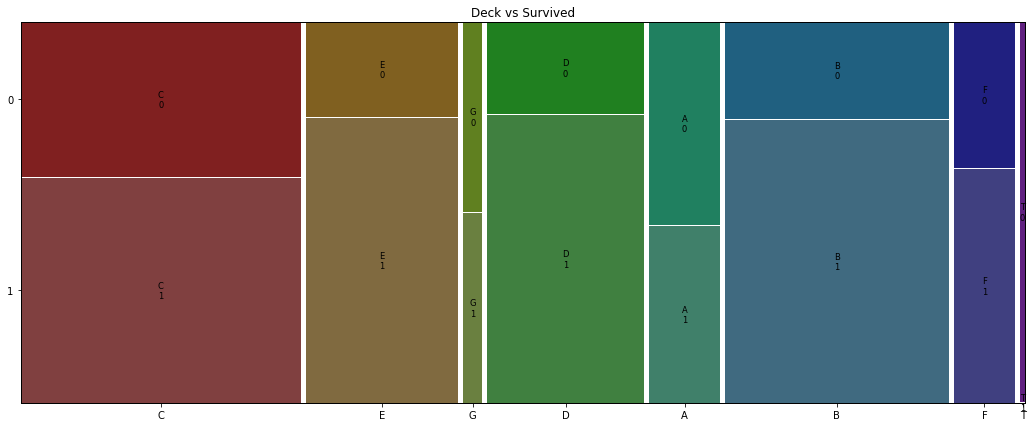

In [9]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(figsize=(18, 7))
mosaic(train_set_transformed, ["Deck", "Survived"], title="Deck vs Survived", ax=ax)
plt.show()

More passengers staying in Deck B, D, E survived than those in the other Decks.

## Extract the # of passengers on same ticket

In [10]:
train_set_transformed1 = train_set.copy()

gb_ticket = train_set_transformed1.groupby("Ticket")

In [11]:
len(gb_ticket.get_group("347082"))

7

In [12]:
train_set_transformed1["PaxOnTicket"] = pd.Series(np.nan, index=train_set_transformed1.index)
paxonticket_idx = train_set_transformed1.columns.get_loc("PaxOnTicket")

for index, row in train_set_transformed1.iterrows():
    if pd.notna(row["Ticket"]):
        train_set_transformed1.iloc[index, paxonticket_idx] = len(gb_ticket.get_group(row["Ticket"]))

In [13]:
train_set_transformed1[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Cabin", "PaxOnTicket"]].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,PaxOnTicket
0,0,3,male,22.0,1,0,A/5 21171,NaN,1.0
1,1,1,female,38.0,1,0,PC 17599,C85,1.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,1.0
3,1,1,female,35.0,1,0,113803,C123,2.0
4,0,3,male,35.0,0,0,373450,NaN,1.0
5,0,3,male,NaN,0,0,330877,NaN,1.0
6,0,1,male,54.0,0,0,17463,E46,1.0
7,0,3,male,2.0,3,1,349909,NaN,4.0
8,1,3,female,27.0,0,2,347742,NaN,3.0
9,1,2,female,14.0,1,0,237736,NaN,2.0


In [14]:
train_set_transformed1.loc[train_set_transformed1["Ticket"] == "349909"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PaxOnTicket
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,4.0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S,4.0
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S,4.0
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,4.0


In [15]:
print(train_set_transformed1.loc[train_set_transformed1["Ticket"] == "347742"])

     PassengerId  Survived  Pclass  \
8              9         1       3   
172          173         1       3   
869          870         1       3   

                                                  Name     Sex   Age  SibSp  \
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
172                       Johnson, Miss. Eleanor Ileen  female   1.0      1   
869                    Johnson, Master. Harold Theodor    male   4.0      1   

     Parch  Ticket     Fare Cabin Embarked  PaxOnTicket  
8        2  347742  11.1333   NaN        S          3.0  
172      1  347742  11.1333   NaN        S          3.0  
869      1  347742  11.1333   NaN        S          3.0  


In the first case of Ticket = 349909, there appears to be 1 child not in the dataset based on SibSp and Parch. As such, it is not possible to derive the number of passengers travelling on the same Ticket accurately (= 4 instead of = 3). In the second case of Ticket = 347742, the number of passengers travelling on the same Ticket (= 3) is correct.

Combine the train and test sets to get the complete passenger data for this analysis.

In [16]:
all_set = pd.concat([train_set, test_set], sort=False)

In [17]:
all_gb_ticket = all_set.groupby("Ticket")

In [18]:
train_set_transformed1["PaxOnTicket"] = pd.Series(np.nan, index=train_set_transformed1.index)
paxonticket_idx = train_set_transformed1.columns.get_loc("PaxOnTicket")

for index, row in train_set_transformed1.iterrows():
    if pd.notna(row["Ticket"]):
        train_set_transformed1.iloc[index, paxonticket_idx] = len(all_gb_ticket.get_group(row["Ticket"]))

In [19]:
train_set_transformed1[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Cabin", "PaxOnTicket"]].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,PaxOnTicket
0,0,3,male,22.0,1,0,A/5 21171,NaN,1.0
1,1,1,female,38.0,1,0,PC 17599,C85,2.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,1.0
3,1,1,female,35.0,1,0,113803,C123,2.0
4,0,3,male,35.0,0,0,373450,NaN,1.0
5,0,3,male,NaN,0,0,330877,NaN,1.0
6,0,1,male,54.0,0,0,17463,E46,2.0
7,0,3,male,2.0,3,1,349909,NaN,5.0
8,1,3,female,27.0,0,2,347742,NaN,3.0
9,1,2,female,14.0,1,0,237736,NaN,2.0


In [20]:
train_set_transformed1.loc[train_set_transformed1["Ticket"] == "A/5 21171"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PaxOnTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1.0


In [21]:
friends = train_set_transformed1.loc[(train_set_transformed1["SibSp"] + train_set_transformed1["Parch"] + 1) != train_set_transformed1["PaxOnTicket"]]
len(friends)

195

In [22]:
friends[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Cabin", "PaxOnTicket"]].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,PaxOnTicket
0,0,3,male,22.0,1,0,A/5 21171,NaN,1.0
6,0,1,male,54.0,0,0,17463,E46,2.0
20,0,2,male,35.0,0,0,239865,NaN,2.0
31,1,1,female,NaN,1,0,PC 17569,B78,3.0
38,0,3,female,18.0,2,0,345764,NaN,2.0
40,0,3,female,40.0,1,0,7546,NaN,1.0
50,0,3,male,7.0,4,1,3101295,NaN,7.0
52,1,1,female,49.0,1,0,PC 17572,D33,3.0
61,1,1,female,38.0,0,0,113572,B28,2.0
68,1,3,female,17.0,4,2,3101281,NaN,1.0


In [23]:
train_set_transformed1.loc[train_set_transformed1["Cabin"].str.contains("E46", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PaxOnTicket
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2.0


In [24]:
train_set_transformed1.loc[train_set_transformed1["Cabin"].str.contains("B78", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PaxOnTicket
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,3.0


In [25]:
all_set.loc[all_set["Ticket"].str.contains("17463", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
146,1038,NaN,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S


In [26]:
all_set.loc[all_set["Ticket"].str.contains("17569", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
316,1208,NaN,1,"Spencer, Mr. William Augustus",male,57.0,1,0,PC 17569,146.5208,B78,C


In the above two cases, PaxOnTicket accounted for the passengers travelling on the same ticket who may not have any SibSp or Parch relationships.

In [44]:
all_set.loc[all_set["Ticket"].str.contains("3101295", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0.0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
164,165,0.0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
266,267,0.0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
638,639,0.0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
686,687,0.0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
824,825,0.0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
367,1259,NaN,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S


## Explore the relationship between Survived and PaxOnTicket

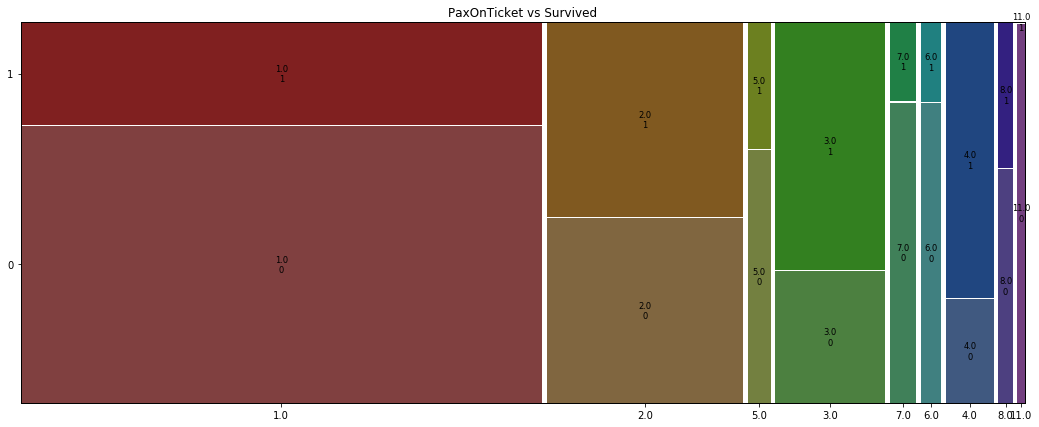

In [27]:
fig, ax = plt.subplots(figsize=(18, 7))
mosaic(train_set_transformed1, ["PaxOnTicket", "Survived"], title="PaxOnTicket vs Survived", ax=ax)
plt.show()

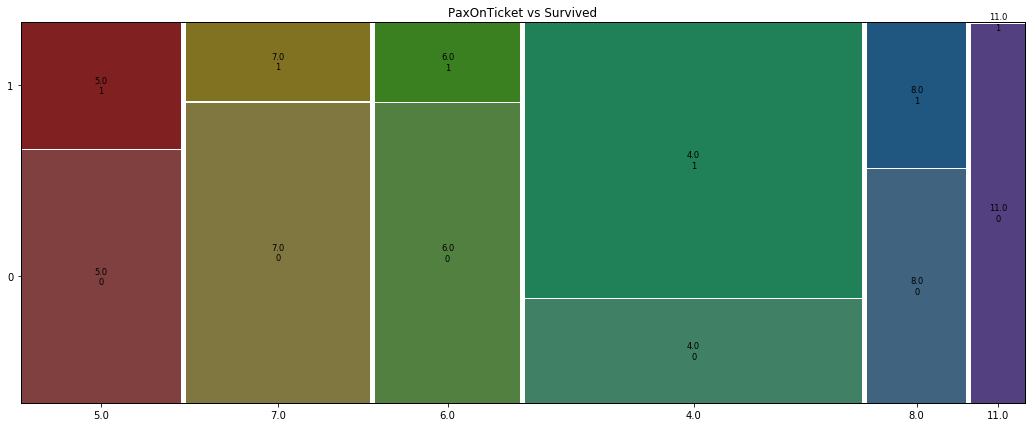

In [28]:
fig, ax = plt.subplots(figsize=(18, 7))
mosaic(train_set_transformed1.loc[train_set_transformed1["PaxOnTicket"] > 3], ["PaxOnTicket", "Survived"], title="PaxOnTicket vs Survived", ax=ax)
plt.show()

Passengers travelling on the same ticket with PaxOnTicket > 5 mostly did not survive.

In [29]:
train_set_transformed2 = train_set_transformed1.join(train_set_transformed["Deck"], how='outer')

In [30]:
train_set_transformed2.loc[train_set_transformed2["PaxOnTicket"] > 3].groupby("Deck").size()

Deck
B    13
C    17
E     2
F     2
dtype: int64

In [31]:
len(train_set_transformed2.loc[(train_set_transformed2["PaxOnTicket"] > 3) & (pd.notna(train_set_transformed2["Deck"]))])

34

In [32]:
train_set_transformed2.loc[train_set_transformed2["PaxOnTicket"] > 5].groupby("Deck").size()

Deck
B    2
C    7
dtype: int64

In [41]:
# Lower Pclass are only in the lower Decks.

train_set_transformed2.groupby(["Pclass", "Deck"]).size()

Pclass  Deck
1       A       15
        B       47
        C       59
        D       29
        E       25
        T        1
2       D        4
        E        4
        F        8
3       E        3
        F        5
        G        4
dtype: int64

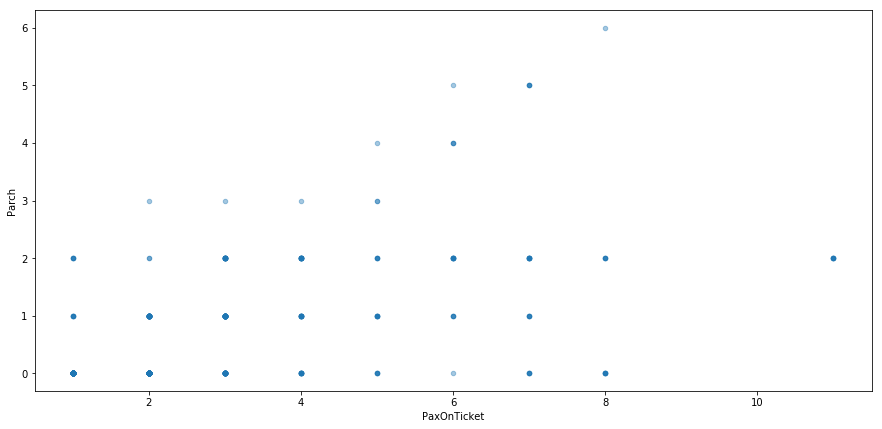

In [33]:
train_set_transformed1.plot(kind="scatter", x="PaxOnTicket", y="Parch", alpha=0.4, figsize=(15,7))
plt.show()

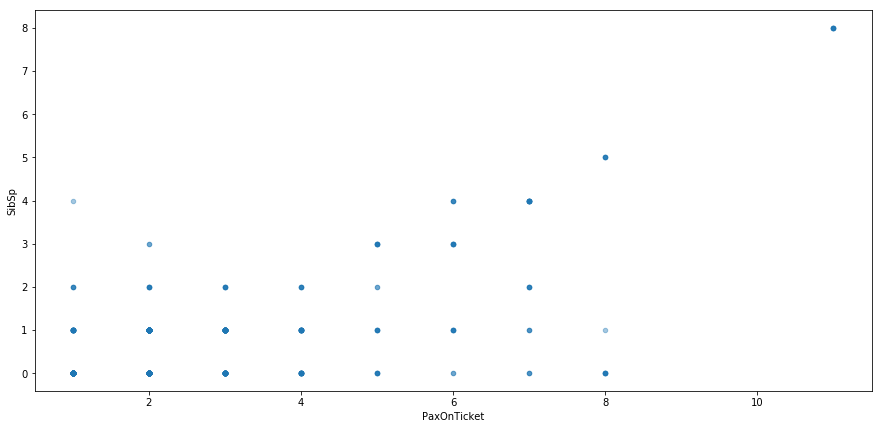

In [34]:
train_set_transformed1.plot(kind="scatter", x="PaxOnTicket", y="SibSp", alpha=0.4, figsize=(15,7))
plt.show()

In [35]:
train_set_transformed1[["Parch", "SibSp", "PaxOnTicket"]].corr()

,Parch,SibSp,PaxOnTicket
Parch,1.000000,0.414838,0.638361
SibSp,0.414838,1.000000,0.727331
PaxOnTicket,0.638361,0.727331,1.000000


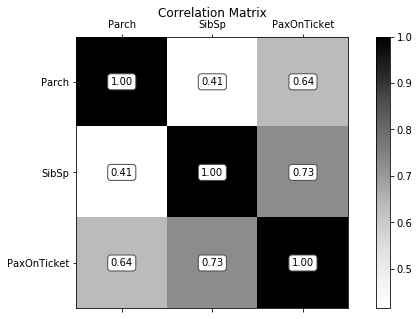

In [36]:
myUtils.plot_corr_matrix(train_set_transformed1[["Parch", "SibSp", "PaxOnTicket"]].corr())

## Findings

The Deck at which a passenger resides appear to affect Survived.

The PaxOnTicket (# of passengers on the same ticket) also appears to affect Survived.

PaxOnTicket is linearly correlated to Parch and SibSp partially.